# Import Library

In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import cv2
import base64
import imageio
from copy import deepcopy
from tqdm import tqdm
from pprint import pprint
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import imghdr

# Load Folder

In [2]:
DataPath = '/Users/taingmolika/Desktop/CADT/FML/Project/lfw_funneled'

In [3]:
dataset = []
for path in glob.iglob(os.path.join(DataPath, "**", "*.jpg")):
    person = path.split("/")[-2]
    dataset.append({"person":person, "path": path})
    
dataset = pd.DataFrame(dataset)
dataset.head(10)

,person,path
0,German_Khan,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
1,Stefano_Gabbana,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
2,Dragan_Covic,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
3,Jeff_Hornacek,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
4,Sureyya_Ayhan,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
5,Deb_Santos,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
6,Bob_Newhart,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
7,Wang_Hailan,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
8,Paul_McNulty,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
9,Paul_McNulty,/Users/taingmolika/Desktop/CADT/FML/Project/lf...


# Data Visualization

In [4]:
dataset.shape

(13233, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  13233 non-null  object
 1   path    13233 non-null  object
dtypes: object(2)
memory usage: 206.9+ KB


In [6]:
dataset.describe(include='all')

,person,path
count,13233,13233
unique,5749,13233
top,George_W_Bush,/Users/taingmolika/Desktop/CADT/FML/Project/lf...
freq,530,1


In [7]:
dataset['person'].count()

13233

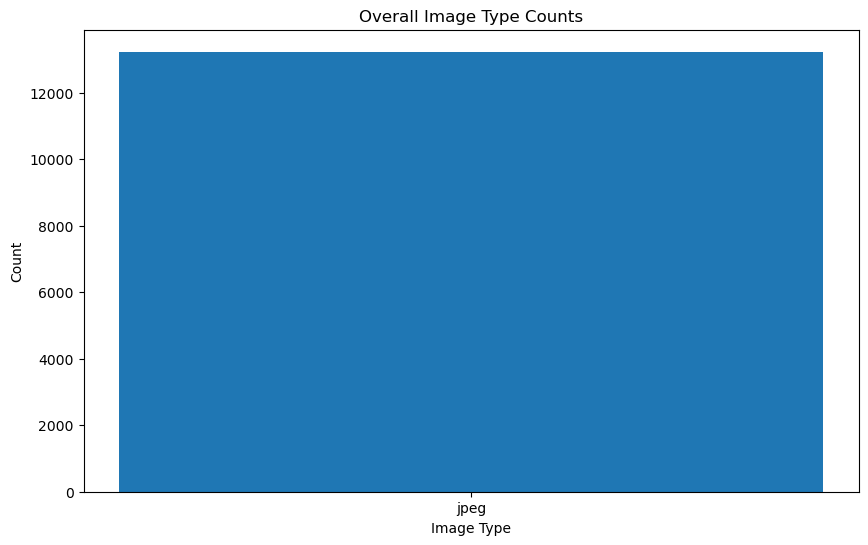

In [8]:
image_types = {}

for root, dirs, files in os.walk(DataPath):
    for file in files:
        file_path = os.path.join(root, file)
        if os.path.isfile(file_path):  # Check if it's a file (not a directory)
            image_type = imghdr.what(file_path)  # Get the image type
            if image_type is not None:
                if image_type not in image_types:
                    image_types[image_type] = 1
                else:
                    image_types[image_type] += 1

# Plotting the image types for each subfolder
labels = list(image_types.keys())
counts = list(image_types.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Overall Image Type Counts')
plt.show()

<AxesSubplot:xlabel='person'>

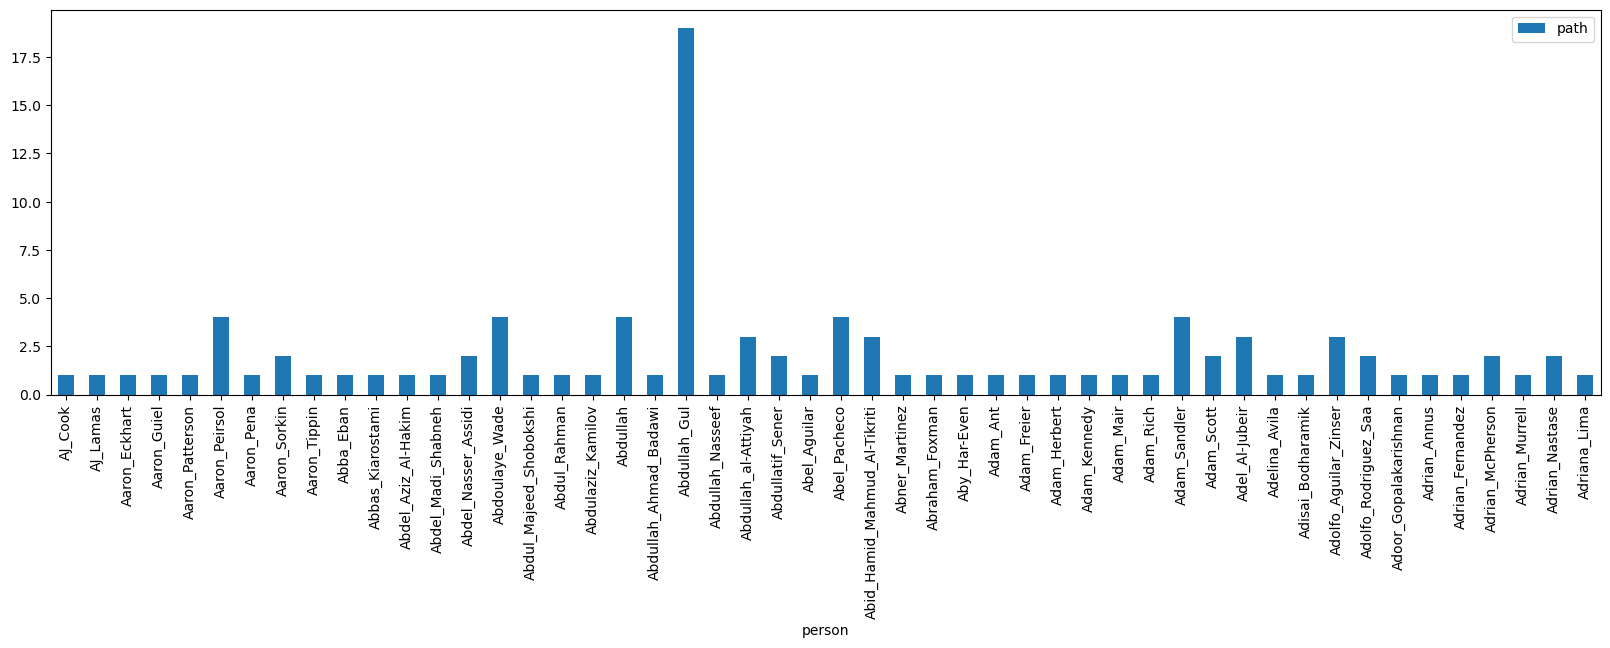

In [9]:
dataset.groupby("person").count()[:50].plot(kind='bar', figsize=(20,5))

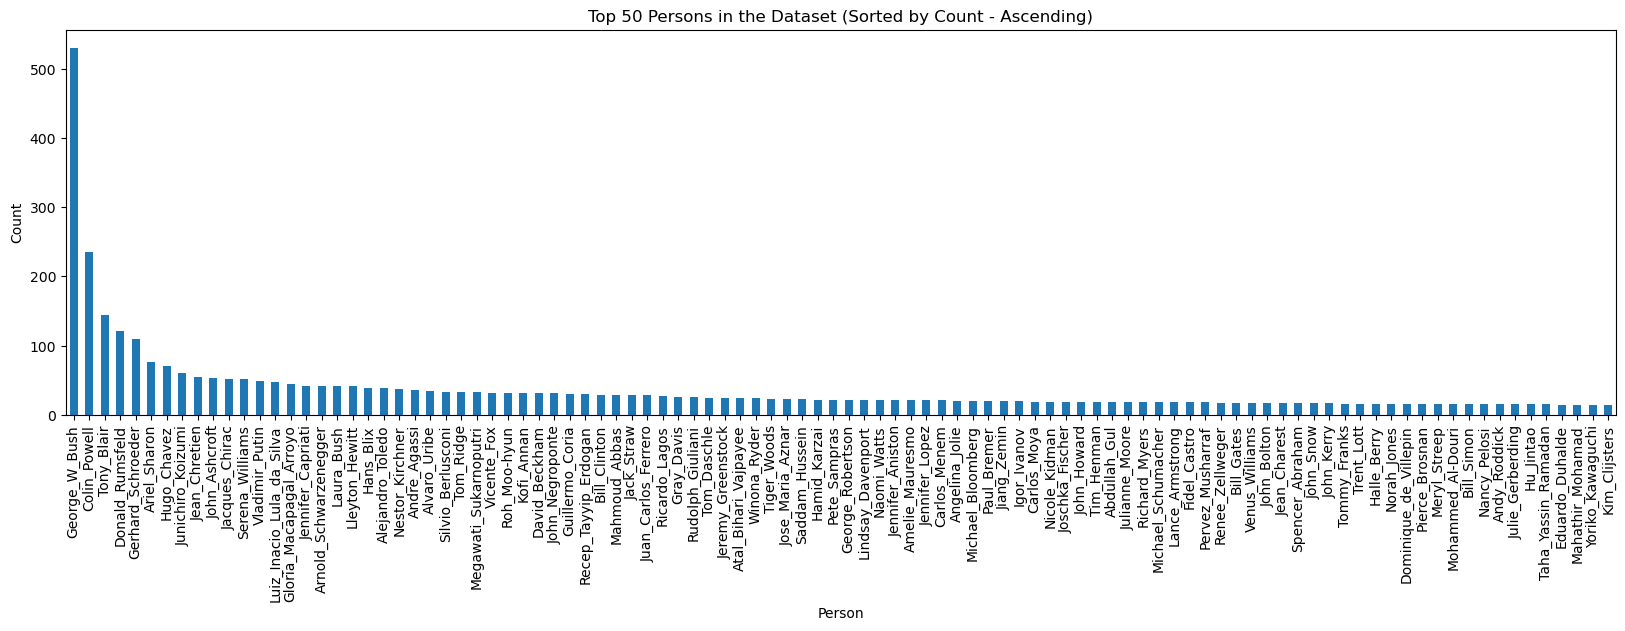

In [10]:
import matplotlib.pyplot as plt

counts = dataset.groupby("person").size().sort_values(ascending=False)[:100]
counts.plot(kind='bar', figsize=(20, 5))

plt.xlabel('Person')
plt.ylabel('Count')
plt.title('Top 50 Persons in the Dataset (Sorted by Count - Ascending)')
plt.xticks(rotation=90)
plt.show()

In [11]:
image_count = dataset['person'].value_counts()

image = image_count[image_count > 10]

print(image)

George_W_Bush             530
Colin_Powell              236
Tony_Blair                144
Donald_Rumsfeld           121
Gerhard_Schroeder         109
                         ... 
John_Paul_II               11
James_Kelly                11
Sergio_Vieira_De_Mello     11
Nicanor_Duarte_Frutos      11
Kim_Ryong-sung             11
Name: person, Length: 143, dtype: int64


In [12]:
image_sizes = []

for file in dataset['path']:
    image = cv2.imread(file)
    if image is not None:  # Check if the image was successfully loaded
        size = image.shape[:2]  # Get the dimensions (height, width)
        image_sizes.append(size)

# Update the dataset DataFrame with the 'Size' column
dataset['Size'] = image_sizes

dataset.head(10)

,person,path,Size
0,German_Khan,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(100, 100)"
1,Stefano_Gabbana,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(100, 100)"
2,Dragan_Covic,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(100, 100)"
3,Jeff_Hornacek,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(100, 100)"
4,Sureyya_Ayhan,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(100, 100)"
5,Deb_Santos,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(250, 250)"
6,Bob_Newhart,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(250, 250)"
7,Wang_Hailan,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(250, 250)"
8,Paul_McNulty,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(250, 250)"
9,Paul_McNulty,/Users/taingmolika/Desktop/CADT/FML/Project/lf...,"(250, 250)"


In [13]:
size_count = dataset['Size'].value_counts()
print(size_count)

(250, 250)    13228
(100, 100)        5
Name: Size, dtype: int64


In [14]:
dataset['path'][0]

'/Users/taingmolika/Desktop/CADT/FML/Project/lfw_funneled/German_Khan/German_Khan_0001.jpg'

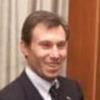

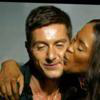

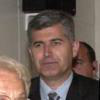

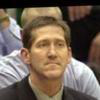

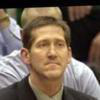

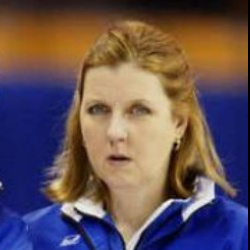

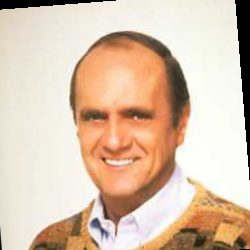

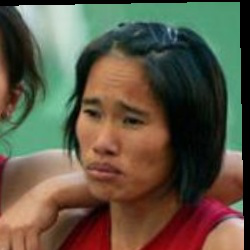

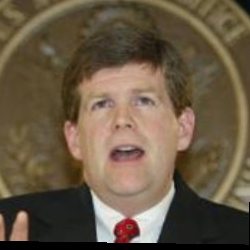

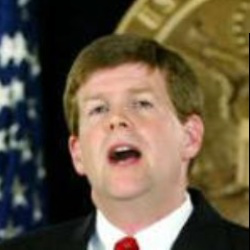

In [15]:
from IPython.display import display
from PIL import Image

for image in dataset['path'][:10]:
    display(Image.open(image))

German_Khan


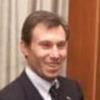

Stefano_Gabbana


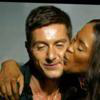

Dragan_Covic


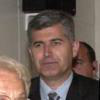

Jeff_Hornacek


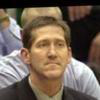

Sureyya_Ayhan


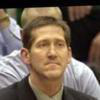

Deb_Santos


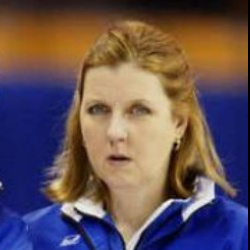

Bob_Newhart


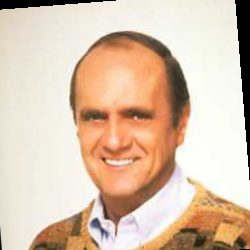

Wang_Hailan


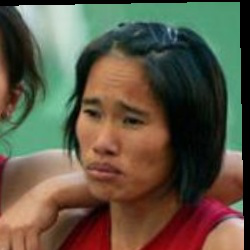

Paul_McNulty


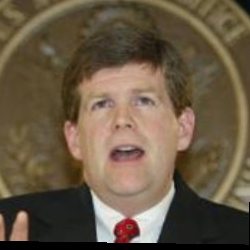

Paul_McNulty


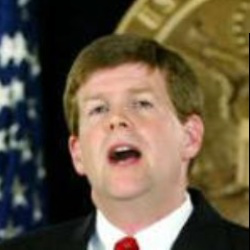

In [16]:
from IPython.display import display
from PIL import Image

for image, name in zip(dataset['path'][:10], dataset['person'][:10]):
    print(name)
    img = Image.open(image)
    display(img)
    img.close()

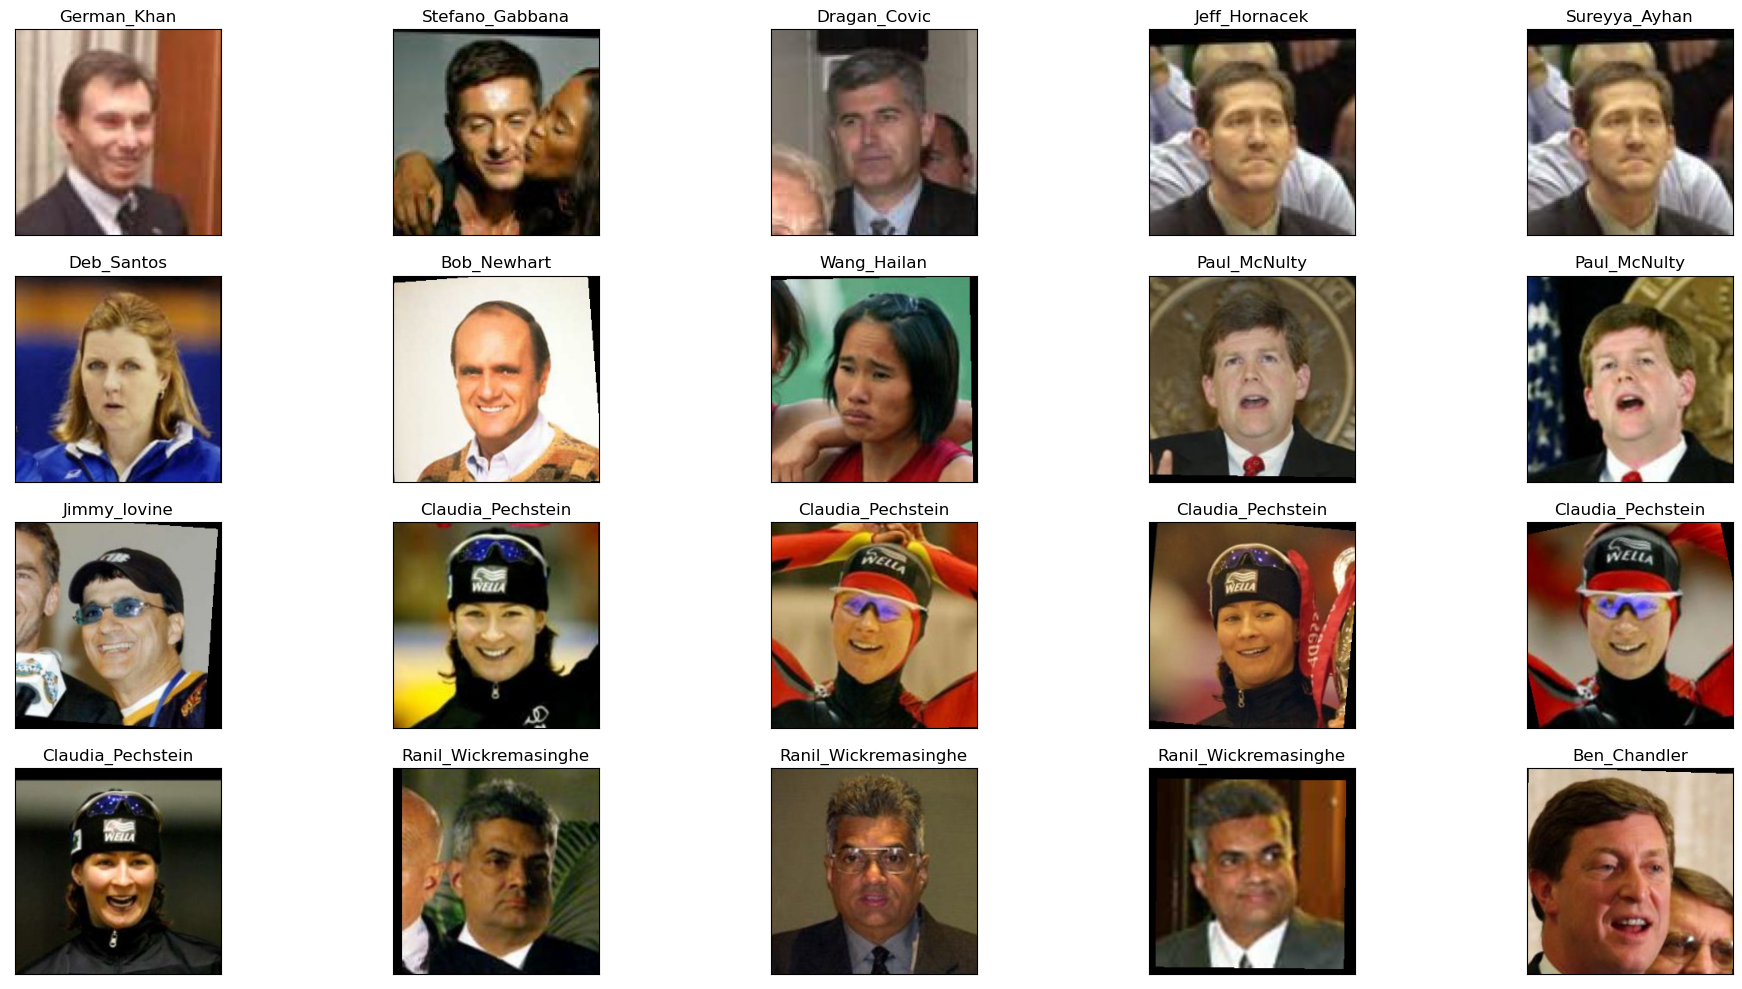

In [17]:
plt.figure(figsize=(20, 10))

for i, path in enumerate(dataset['path'][:20]):
    img = plt.imread(path)
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(dataset['person'].iloc[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

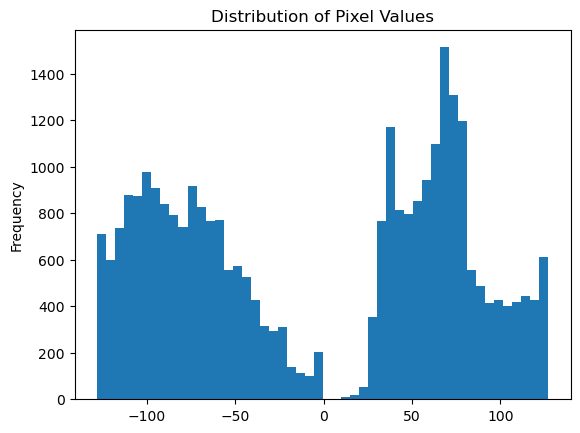

In [18]:
path = dataset['path'][0]
pixels = pd.Series(list(plt.imread(path).flatten()))

pixels.plot(kind='hist', bins=50, title='Distribution of Pixel Values')
plt.show()

In [19]:
image = plt.imread(path)
pixels = image.flatten()

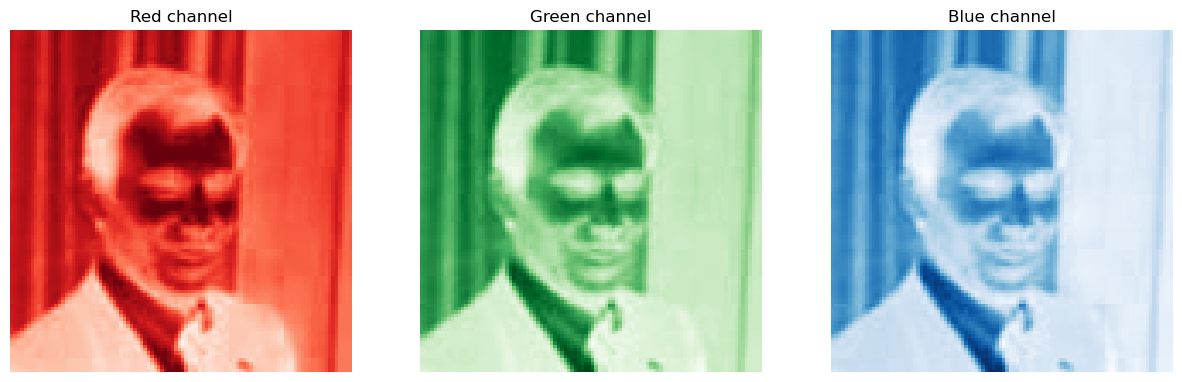

In [20]:
# Display RGB Channels of our image
image = plt.imread(path)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image[:, :, 0], cmap='Reds')
axs[1].imshow(image[:, :, 1], cmap='Greens')
axs[2].imshow(image[:, :, 2], cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')

plt.show()

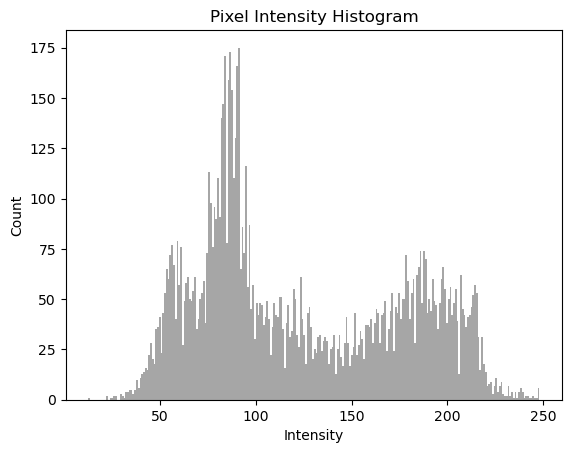

In [21]:
image = plt.imread(dataset['path'][0])

# Convert the image to grayscale if it's in color
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# Flatten the image to a 1D array
pixels = image.flatten()

# Plot the histogram
plt.hist(pixels, bins=256, color='gray', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Pixel Intensity Histogram')

# Show the plot
plt.show()

# Preprocessing

In [37]:
def clean(image_path):
    new_size = (100, 100)  # Desired new size for the resized image
    gray_images = []  # List to store the resulting grayscale images

    for path in image_path:
        # Read the image using OpenCV
        image = cv2.imread(path)

        # Resize the image using Pillow
        resized_image = Image.fromarray(image).resize(new_size)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(np.array(resized_image), cv2.COLOR_BGR2GRAY)
        
        gray_images.append(gray_image)  # Append the grayscale image to the list

    return gray_images

In [43]:
clean_image = clean(dataset['path'][:5])

[array([[189, 176, 176, ..., 118, 117,  98],
        [188, 176, 177, ..., 118, 116,  97],
        [187, 177, 179, ..., 118, 116,  96],
        ...,
        [ 61,  62,  64, ...,  58,  58,  58],
        [ 56,  57,  60, ...,  58,  58,  58],
        [ 49,  50,  54, ...,  57,  57,  57]], dtype=uint8),
 array([[ 1,  1,  1, ...,  2,  2,  2],
        [20, 20, 19, ...,  0,  1,  0],
        [96, 95, 93, ...,  4,  4,  4],
        ...,
        [ 6, 19, 27, ..., 13,  7,  9],
        [11, 12, 12, ..., 12,  6,  7],
        [17, 12, 13, ..., 11,  5,  6]], dtype=uint8),
 array([[110, 110, 109, ..., 136, 136, 136],
        [110, 109, 109, ..., 137, 137, 137],
        [109, 109, 108, ..., 138, 138, 138],
        ...,
        [150, 145, 143, ...,  31,  17,   0],
        [140, 131, 124, ...,  31,  17,   0],
        [125, 113, 102, ...,  31,  17,   0]], dtype=uint8),
 array([[  2,   2,   2, ...,   2,   1,   1],
        [  1,   1,   1, ...,   0,   0,   0],
        [  1,   1,   1, ...,   2,   2,   3],
       

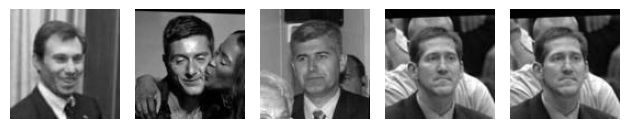

In [44]:
gray_scale_images = clean(dataset['path'][:5])

# Display the grayscale images
for i, img in enumerate(grayscale_images):
    plt.subplot(1, len(grayscale_images), i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

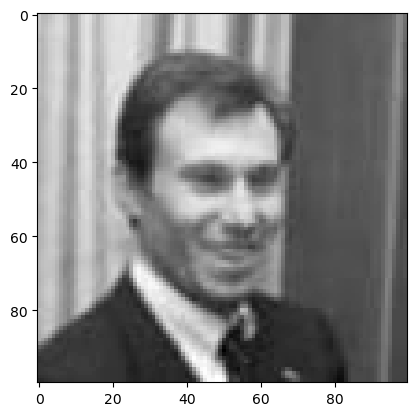

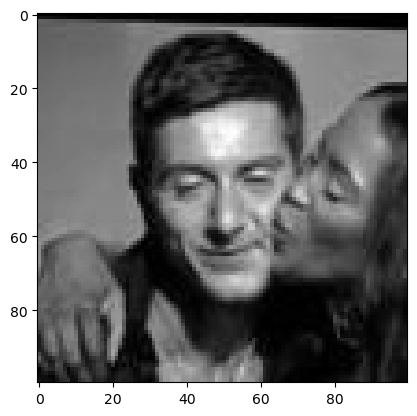

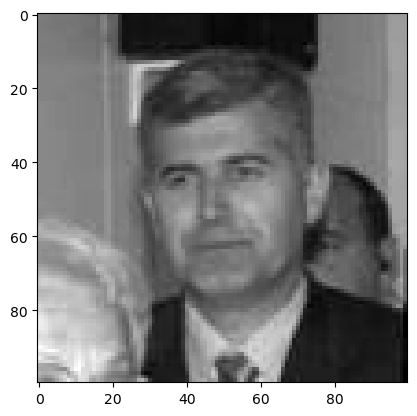

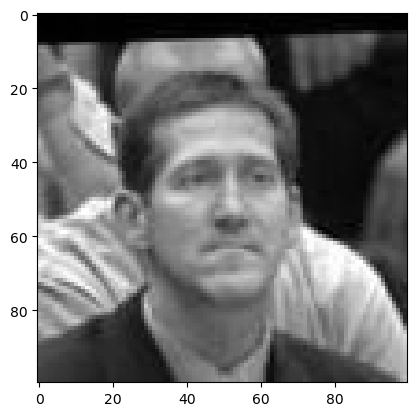

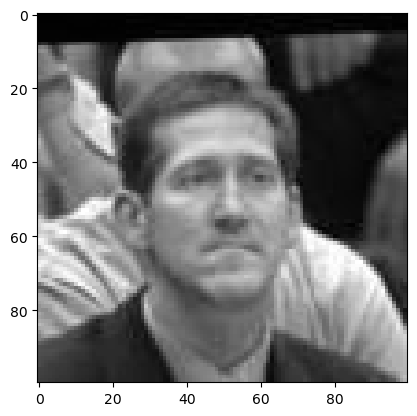

In [23]:
# Just plot to see the function 
# Scale the image to gray
for path in dataset['path'][:5]:
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap='gray')
    plt.show()

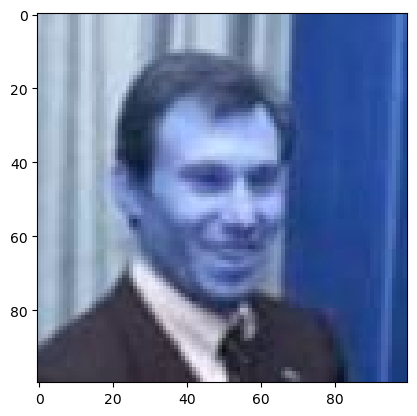

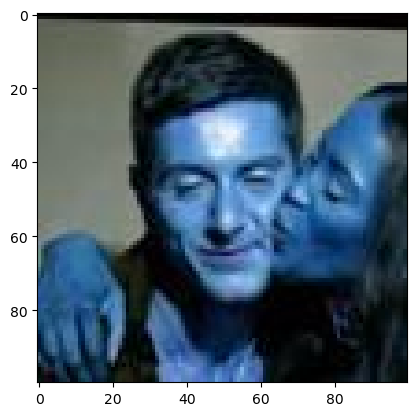

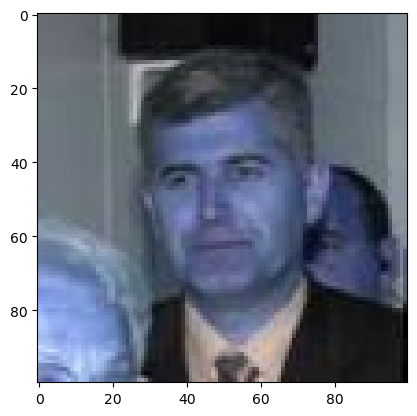

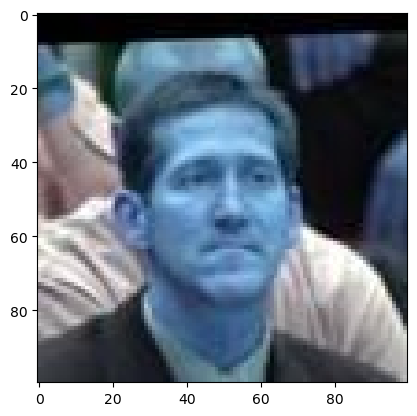

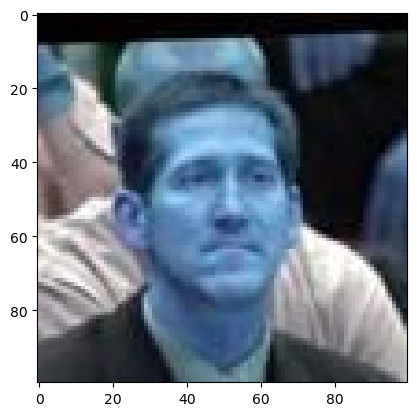

In [26]:
# Just plot to see the function 
for path in dataset['path'][:5]:
    # Read the image using OpenCV
    image = cv2.imread(path)

    # Resize the image using Pillow
    resized_image = Image.fromarray(image).resize((100, 100))

    # Save the resized image
    resized_image.save(path)

    # Display the resized image using Matplotlib
    plt.imshow(resized_image)
    plt.show()